 # Classification Algorithms

## Objective:
This tutorial covers the basics of classification algorithms, and how they work, provides examples, and discusses evaluation metrics using Python. We will:
- Import the necessary libraries, including scikit-learn for the dataset and linear regression.
- Load the Titanic dataset, explore it, and pre-process the data.
- Split into training and testing sets using train_test_split.
- Create a decision tree model and train it on the training data.
- Make predictions on the test data, and we evaluate its performance using accuracy, ROC curve, F1 score, precision and recall.


## Pre-requisites:

- Python Environment: You should have a Python environment set up on your system. If you don't have Python installed, you can download it from the [official Python website](https://www.python.org/downloads/). We recommend downloading Python 3.8 or above.
- Jupyter Notebook: This code is intended to be run in a Jupyter Notebook environment. Make sure you have [Jupyter Notebook installed](https://jupyter.org/install).
- Library Installation: Before getting started, ensure you have the following libraries installed. You can install them using pip if you haven't already:
    - NumPy: A library for numerical computations.
    - Matplotlib: A library for data visualization.
    - Pandas: A library for data manipulation and analysis.
    - Scikit-Learn: A machine learning library for various algorithms.
    - Seaborn: A library for data visualization.


To install, run the following commands:
"**!pip3 install numpy matplotlib pandas seaborn scikit-learn**"

In [439]:
# Install necessary libraries
!pip3 install numpy matplotlib pandas scikit-learn seaborn plotly scikit-plot==0.3.7 scipy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [391]:
# Import necessary libraries

import pandas as pd
import numpy as np
import re
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True) # initialize Plotly for Jupyter notebook.  
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

We import necessary libraries:

- pandas helps us pre-process the data
- numpy for numerical operations and scipy for statistical calculations.
- matplotlib.pyplot, sns and plotly for data visualization.
- train_test_split to split the dataset into training and testing sets.
- sklearn.metrics for metrics accuracy_score, classification_report, confusion_matrix
- sklearn imports the entire tree module from scikit-learn, which includes not only decision trees but also other tree-related algorithms and utilities.
- sklearn.model_selection imports the KFold class for performing K-Fold cross-validation.
- sklearn.model_selection imports the cross_val_score function, which is used to perform cross-validation and obtain cross-validation scores for a given model and dataset.

### Load the Dataset

The Titanic dataset is a famous dataset in the field of data science and machine learning. It contains information about the passengers on the Titanic, which famously sank on its voyage. The dataset contains 891 rows and 12 features which are as follows:

- **PassengerId**: A unique identifier for each passenger.
- **Survived**: A binary variable indicating whether the passenger survived (1) or did not survive (0).
- **Pclass (Passenger Class)**: The class of the ticket (1st, 2nd, or 3rd class).
- **Name**: The name of the passenger.
- **Sex**: The gender of the passenger (male or female).
- **Age**: The age of the passenger.
- **SibSp**: The number of siblings or spouses the passenger had aboard.
- **Parch**: The number of parents or children the passenger had aboard.
- **Ticket**: The ticket number.
- **Fare**: The fare paid for the ticket.
- **Cabin**: The cabin number where the passenger stayed (many entries are missing).
- **Embarked**: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

The dataset is often used to explore and analyze various aspects of the Titanic tragedy, such as the demographics of the passengers, survival rates by class, gender, and age, and the factors that may have influenced a passenger's chances of survival.

In [392]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **Survived** is in binary format so no additional formatting is necessary.
- Features like **Name, Ticket and Cabin** need to be adapted for the problem we're trying to solve.

In [393]:
# Store our test passenger IDs for easy access
PassengerId = titanic_data['PassengerId']
PassengerId

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [394]:
# Dimension of the dataset
print(np.shape(titanic_data))

(891, 12)


### Exploratory Data Analysis

In [395]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- We observe that there are missing values in the **Age, Cabin and Embarked** columns.

In [396]:
# Handling missing values 

#Embarked
titanic_data['Embarked'].fillna('S', inplace=True)

#Fare
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)  # Fill with median

#Age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)  # Fill with median

Now that the missing values for Cabin are handled, let us create a new column in the dataset called 'Has_Cabin,' to indicate whether a passenger has a cabin or not based on the 'Cabin' column in the dataset.

In [397]:
# Whether a passenger had a Cabin or not
titanic_data['Has_Cabin'] = titanic_data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [398]:
# Summary of the data to see the distribution of data
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare   Has_Cabin  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.228956  
std      0.806057   49.693429    0.420397  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    0.000000  
50%      0.000000   14.454200    0.000000  
75%      0.000000   31.000000    0.000000  
max      6.000000

We learn that:

- **PassengerId**: This is just an identifier for each passenger, and the statistics here don't have much meaning. It ranges from 1 to 891, as expected.
- **Survived**: This column is binary (0 or 1), indicating whether a passenger survived (1) or did not survive (0). The statistics show that about 38.38% of passengers in the dataset survived, which is the mean. The standard deviation (std) is 0.486592, which means there was some variation in survival. The minimum (min) is 0, indicating that at least one passenger did not survive, and the maximum (max) is 1, indicating that at least one passenger did survive.
- **Pclass**: This represents the passenger class, with values 1, 2, or 3. The mean of 2.308642 suggests that the average passenger class is around 2.3, which is closer to 3rd class. The standard deviation (std) shows the variability in class. The min is 1, the max is 3, and the quartiles (25%, 50%, 75%) indicate the distribution of passengers among different classes.
- **Age**: This is the age of the passengers. The mean age is approximately 29.3 years, with a standard deviation of 13. The minimum age is 0.42 (likely an infant), and the maximum age is 80. The quartiles show the age distribution among passengers.
- **SibSp**: This represents the number of siblings or spouses aboard. The mean is approximately 0.523, indicating, on average, passengers had a sibling or spouse on board. The std shows some variability. The min is 0, and the max is 8, indicating a wide range of family sizes.
- **Parch**: This is the number of parents or children aboard. The mean is approximately 0.382, indicating that, on average, passengers did not have a parent or child on board. The std shows some variability. The min is 0, and the max is 6, indicating a range of family sizes.
- **Fare**: This is the fare paid for the ticket. The mean fare is approximately 32.20, with a high standard deviation of 49.69, indicating a wide range in ticket prices. The minimum fare is 0, and the maximum is 512.33. The quartiles give insights into the distribution of fares among passengers.

Although, we have the age of the passengers, their siblings aboard and if parents accompanied them, we do not know their family size and if there were individuals traveling alone. Let's create new features 'FamilySize' and 'is_alone' to understand if the size of a passenger's family or traveling alone impacted their survival rates. 

In [399]:
# Create new feature FamilySize as a combination of SibSp and Parch
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [400]:
# Create new feature is_alone from FamilySize
titanic_data['is_alone'] = 0
titanic_data.loc[titanic_data['FamilySize'] == 1, 'is_alone'] = 1
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1


#### Univariate Analysis

Let us conduct Univariate analysis on our features for a more detailed examination of the data distribution through techniques such as histograms, box plots, skewness, and kurtosis. 

In [401]:
# Counting Survived and non-survived passengers
titanic_data.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

- Approximately 38% survived and 61% passengers did not survive in the titanic tragedy.

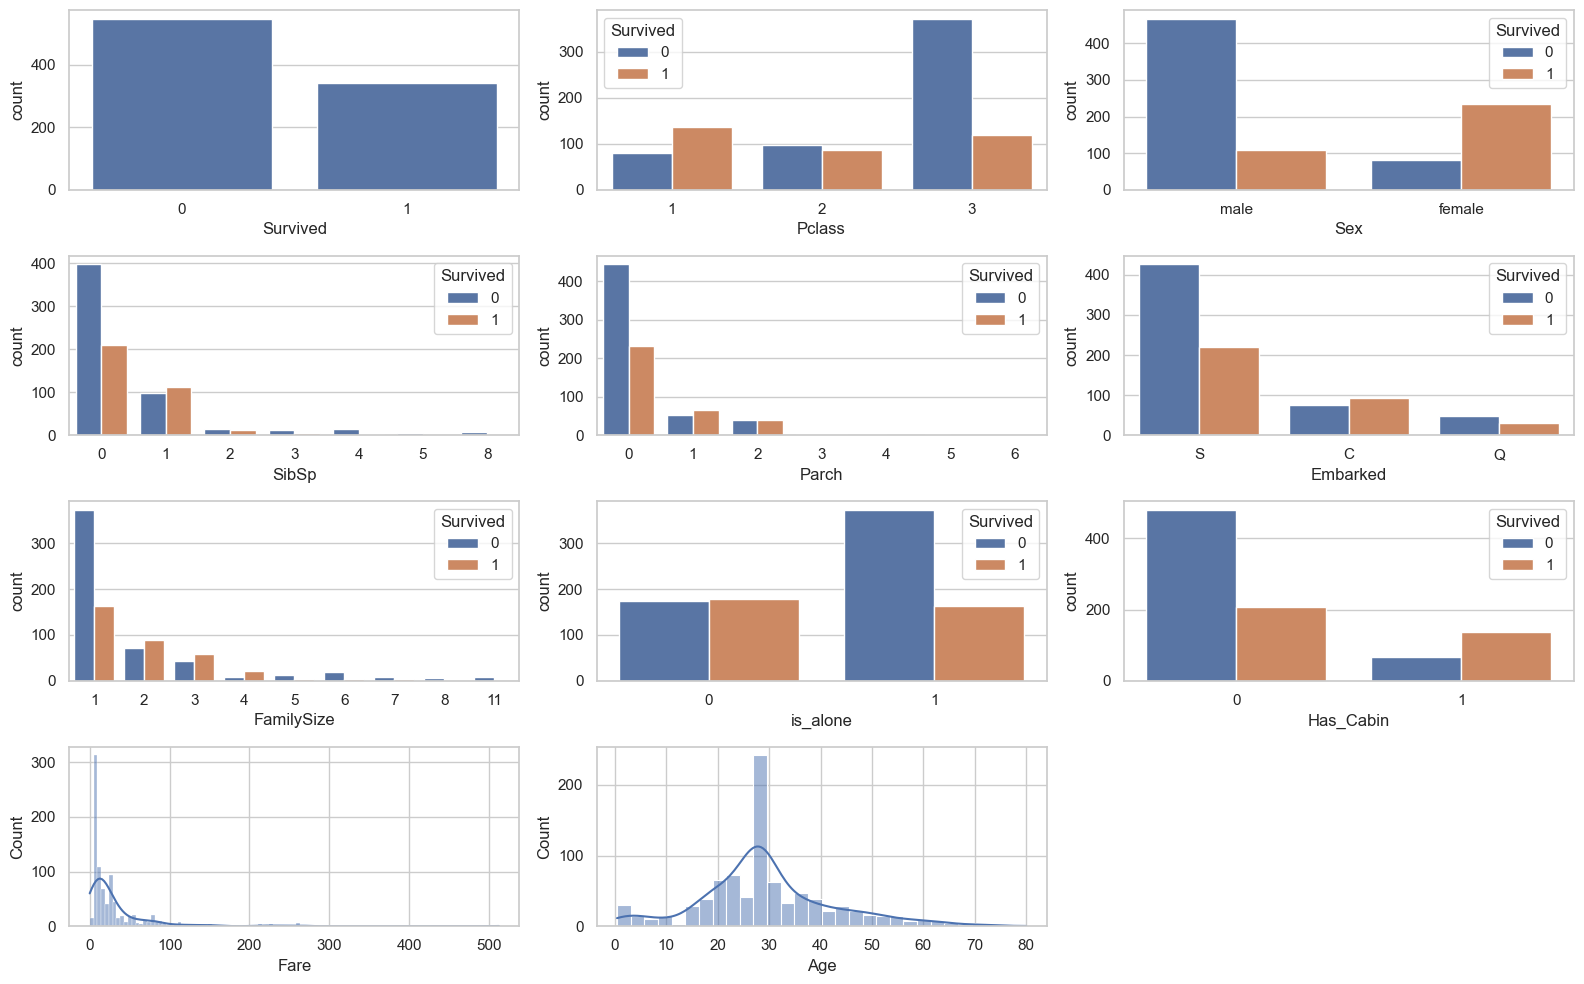

In [402]:
# Univariate analysis

# Create a 2x4 grid of subplots with a specified figure size
fig, axes = plt.subplots(4, 3, figsize=(16, 10))

# Create a countplot for columns for the subplot
sns.countplot(x='Survived', data=titanic_data, ax=axes[0, 0])

sns.countplot(x='Pclass', hue = 'Survived', data = titanic_data, ax=axes[0, 1])

sns.countplot(x='Sex', hue = 'Survived', data=titanic_data, ax=axes[0, 2])

sns.countplot(x='SibSp', hue = 'Survived', data=titanic_data, ax=axes[1, 0])

sns.countplot(x='Parch', hue = 'Survived', data=titanic_data, ax=axes[1, 1])

sns.countplot(x='Embarked', hue = 'Survived', data=titanic_data, ax=axes[1, 2])

sns.countplot(x='FamilySize', hue = 'Survived', data=titanic_data, ax=axes[2, 0])

sns.countplot(x='is_alone', hue = 'Survived', data=titanic_data, ax=axes[2, 1])

sns.countplot(x='Has_Cabin', hue = 'Survived', data=titanic_data, ax=axes[2, 2])


# Use histplot for the distribution plot of  categorical variables 'Fare' and 'Age'
sns.histplot(titanic_data['Fare'], kde=True, ax=axes[3, 0])
sns.histplot(titanic_data['Age'], kde=True, ax=axes[3, 1])


# Remove the last subplot
fig.delaxes(axes[3, 2])

# Adjust the layout to fill the empty space
plt.tight_layout()

We learn that: 
- As we can see ‘0’ (not survived) has a value > 500 means and 1 (survived) has approximately 350 values.
- We can see that the survival rate is the highest among the passengers for 1st class tickets and lowest among the 3rd class tickets.
- We observe that the survival rate among males is lower than females. Approximately, the value for men who did not survive exceeds 400.
- Passengers with 0 (traveling alone) or more than 4 siblings did not survive. Passengers with 1 sibling have more or less an equal chance to survive or not. As the number of siblings increases to 3, 4, 5, and 8 have a very low chance of surviving.
- Passengers with 0 (traveling alone) or more than 3 parents/children on board had a very low chance of surviving on Titanic. Passengers with 1 parent/child have more or less an equal chance to survive or not. As the number of parents/children increases to 3, 4, 5, and 6, the chance of survival decreases.
- The non-survival rate for passengers who embarked on their Titanic journey from Southampton is more than 400. Passengers embarked at Cherbourg had a higher chance to survive than passengers embarked at Queenstown and Southampton.
- Individuals traveling with families show a better survival rate than those without. Similar pattern shows in is_alone where those were not traveling alone show a better survival rate.
- Passengers who bought cheaper tickets had  a low survival rate.
- The distribution of the data for "Age" is skewed a little to the left. Passengers who were less than 20 years of age (a child/teenager) had a greater rate of survival. Perhaps, the rescue plans prioritized children/teenagers. Passengers who are older than 20 years but less than 45 years, had a low survival rate. For passengers with an age greater than 65, had a low survival rate.

In summary:

- Survivors were more likely to travel with parents/children
- Survivors were likely to travel with at least one family member and the rate of survival improves as the family size gets bigger (around 4).
- Survivors had relatively more expensive tickets (Pclass 1 had a greater number of survivors).
- Children were more likely to survive compared to victims among all other age groups.
- Women were much more likely to survive than men.
- Passengers embarked at Cherbourg had a higher chance to survive than passengers embarked at Queenstown and Southampton.
- Those who survived most likely had cabins.

### Data Pre-processing

In [403]:
# Feature selection: remove variables no longer containing relevant information

drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
new_df = titanic_data.drop(drop_elements, axis = 1)

In [404]:
# Print new_df
new_df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,is_alone
0,0,3,male,22.0,0,7.2500,S,0,2,0
1,1,1,female,38.0,0,71.2833,C,1,2,0
2,1,3,female,26.0,0,7.9250,S,0,1,1
3,1,1,female,35.0,0,53.1000,S,1,2,0
4,0,3,male,35.0,0,8.0500,S,0,1,1


In [405]:
# Encoding categorical variables

# Sex
new_df['Sex'] = new_df['Sex'].map({'female': 0, 'male': 1}).astype(int)

# Embarked
new_df['Embarked'] = new_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# Fare
new_df.loc[new_df['Fare'] <= 7.91, 'Fare'] = 0
new_df.loc[(new_df['Fare'] > 7.91) & (new_df['Fare'] <= 14.454), 'Fare'] = 1
new_df.loc[(new_df['Fare'] > 14.454) & (new_df['Fare'] <= 31), 'Fare'] = 2
new_df.loc[new_df['Fare'] > 31, 'Fare'] = 3
new_df['Fare'] = new_df['Fare'].astype(int)

# Normalize values for age
new_df.loc[ new_df['Age'] <= 16, 'Age'] 					    = 0
new_df.loc[(new_df['Age'] > 16) & (new_df['Age'] <= 32), 'Age'] = 1
new_df.loc[(new_df['Age'] > 32) & (new_df['Age'] <= 48), 'Age'] = 2
new_df.loc[(new_df['Age'] > 48) & (new_df['Age'] <= 64), 'Age'] = 3
new_df.loc[ new_df['Age'] > 64, 'Age'] ;

In [406]:
new_df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,is_alone
0,0,3,1,1.0,0,0,0,0,2,0
1,1,1,0,2.0,0,3,1,1,2,0
2,1,3,0,1.0,0,1,0,0,1,1
3,1,1,0,2.0,0,3,0,1,2,0
4,0,3,1,2.0,0,1,0,0,1,1


We encoded categorical variables to normalize numerical variables. Let's break down each section:

- Sex: Mapped the column values to numerical values.
    - 'female' is mapped to 0
    - 'male' is mapped to 1.
- Embarked: Maps the 'Embarked' column values to numerical values.
    - 'S' is mapped to 0
    - 'C' is mapped to 1
    - 'Q' is mapped to 2.
- Fare: The 'Fare' values are categorized into different numerical values based on specific fare ranges.
    - Values less than or equal to 7.91 are set to 0.
    - Values between 7.91 and 14.454 are set to 1.
    - Values between 14.454 and 31 are set to 2.
    - Values greater than 31 are set to 3.
- Age: The 'Age' values are normalized into categories.
    - Ages less than or equal to 16 are set to 0.
    - Ages between 17 and 32 are set to 1.
    - Ages between 33 and 48 are set to 2.
    - Ages between 49 and 64 are set to 3.
    - Ages greater than 64 are not processed in this code.

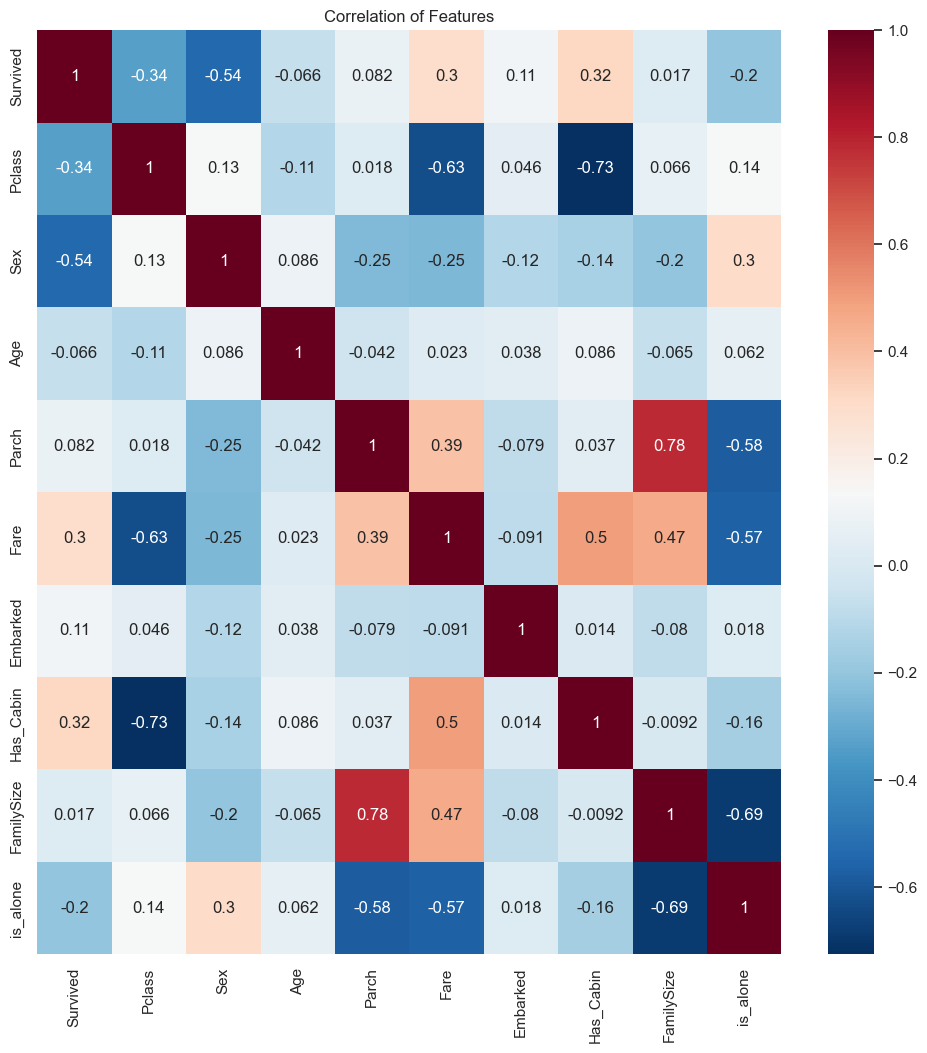

In [407]:
# Create a heatmap to get the correlation of features

plt.figure(figsize=(12, 12))  # Set the figure size
sns.heatmap(new_df.corr(), annot=True, cmap='RdBu_r')  # 'annot' adds values to cells, 'cmap' sets the color map

plt.title("Correlation of Features")  # Set the title
plt.show()

From the Heatmap we learn that 'Sex' , 'Pclass' and 'Fare' are highly correlated (in absolute terms) with the class (Survived): 0.54, 0.34 and 0.3 respectively.

### Model Building and Evaluation

In [408]:
# Selecting features and target variable
X = new_df[['Pclass', 'Sex', 'Fare']]
y = new_df['Survived']

In [409]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [410]:
# View the training dataset
X_train

,Pclass,Sex,Fare
331,1,1,2
733,2,1,1
382,3,1,1
704,3,1,0
813,3,0,3
...,...,...,...
106,3,0,0
270,1,1,2
860,3,1,1
435,1,0,3


Now, we will have four datasets ready for use in your machine learning model:

- X_train: The features for training the model.
- X_test: The features for testing the model.
- y_train: The corresponding labels for training.
- y_test: The corresponding labels for testing.

In [411]:
# Implement k-fold cross-validation and build the model

cv = KFold(n_splits=5)            # Initialize K-Fold cross-validator with 5 folds
accuracies = list()               # Create an empty list to store accuracies for each max depth

depth_range = range(1, 6)         # Define a range of max depths for the decision tree


# Loop over each max depth
for depth in depth_range:
    fold_accuracy = []            # Create an empty list to store accuracies for each fold
    tree_model = tree.DecisionTreeClassifier(max_depth = depth) # Create a decision tree model with specified max depth
    print("Current max depth: ", depth, "\n")

    # Perform K-Fold cross-validation
    for train_fold, valid_fold in cv.split(X_train):
        # Extract train and validation data using current fold indices
        f_train_X = X_train.iloc[train_fold] 
        f_valid_X = X_train.iloc[valid_fold] 
        f_train_y = y_train.iloc[train_fold] 
        f_valid_y = y_train.iloc[valid_fold]

        # Create and fit the decision tree model using the training data for the current fold
        model = tree_model.fit(X = f_train_X, y = f_train_y) 
        
        # Calculate accuracy using the validation data for the current fold
        valid_acc = model.score(X = f_valid_X, y = f_valid_y)

        # Store the accuracy for the current fold
        fold_accuracy.append(valid_acc)
        
    # Calculate and store the average accuracy for the current max depth
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
    # Print accuracy for each fold and the average accuracy for the current max depth
    print("Accuracy per fold: ", fold_accuracy, "\n")
    print("Average accuracy: ", avg)
    print("\n")

Current max depth:  1 

Accuracy per fold:  [0.7832167832167832, 0.8181818181818182, 0.7605633802816901, 0.7535211267605634, 0.823943661971831] 

Average accuracy:  0.7878853540825372


Current max depth:  2 

Accuracy per fold:  [0.7622377622377622, 0.8251748251748252, 0.7605633802816901, 0.7394366197183099, 0.823943661971831] 

Average accuracy:  0.7822712498768837


Current max depth:  3 

Accuracy per fold:  [0.7972027972027972, 0.8321678321678322, 0.7887323943661971, 0.7676056338028169, 0.8309859154929577] 

Average accuracy:  0.8033389146065202


Current max depth:  4 

Accuracy per fold:  [0.7832167832167832, 0.8251748251748252, 0.7887323943661971, 0.7535211267605634, 0.8098591549295775] 

Average accuracy:  0.7921008568895893


Current max depth:  5 

Accuracy per fold:  [0.7832167832167832, 0.8251748251748252, 0.7887323943661971, 0.7535211267605634, 0.7746478873239436] 

Average accuracy:  0.7850586033684624




 Max Depth  Average Accuracy
         1          0.787885
         2          0.782271
         3          0.803339
         4          0.792101
         5          0.785059


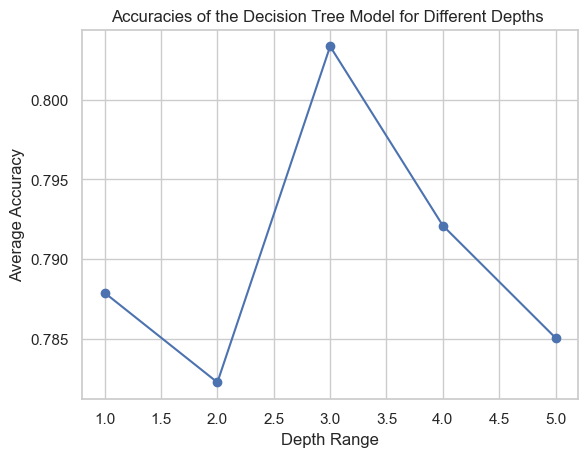

In [428]:
# View the results
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

# Plotting the accuracy for different max depths
plt.plot(df['Max Depth'], df['Average Accuracy'], marker='o', linestyle='-')
plt.title('Accuracies of the Decision Tree Model for Different Depths ')
plt.xlabel('Depth Range')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()

The results suggest that a max depth of 3 (80.3% average accuracy across the 5 folds) has the highest average accuracy among the tested depths. It provides insights into how the model performs with different complexities and helps in selecting the best hyperparameter for the decision tree model.

The plot of accuracies for different depths gives you insight into how the performance of your decision tree model changes with varying depths. Here's how you can interpret the plot:

- Trend Analysis: If the accuracy initially increases and then plateaus or decreases, it suggests that there's an optimal max depth for your model.
    - If the accuracy continually increases, it might indicate that your model benefits from deeper trees.
    - If the accuracy decreases, it could be a sign of overfitting.
- Optimal Max Depth: Look for the point where the accuracy is highest. This corresponds to the "optimal" max depth for your model within the given range.
- Overfitting: If the accuracy is very high for the training data but doesn't generalize well to new data (validation or test set), it could be a sign of overfitting. In this case, you might want to consider shallower trees.
- Underfitting: If the accuracy is low, it might be a sign of underfitting. You could try increasing the max depth to capture more complex patterns in the data.

In your specific case, the accuracy seems to peak at a max depth of 3, but it's always good to consider the specific characteristics of your dataset and the problem you're solving. You may want to experiment further with other hyperparameters or conduct cross-validation to ensure the robustness of your model.

### Final Model

In [414]:
# Evaluation Metrics

# Accuracy of the training model
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

80.34

The accuracy of the training model is 80.34.

In [413]:
# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [415]:
# Predicting results for test dataset
y_pred = decision_tree.predict(X_test)

#### Model Evaluation

In [443]:
# Confusion matrix

# Calculate values for the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Extract True Positives (TP), True Negatives (TN), and False Positives (FP)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Print the values
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

True Positives (TP): 51
True Negatives (TN): 90
False Positives (FP): 15
False Negatives (FN): 23


<Axes: title={'center': 'Confusion Matrix of Actual versus Predicted Values'}, xlabel='Predicted label', ylabel='True label'>

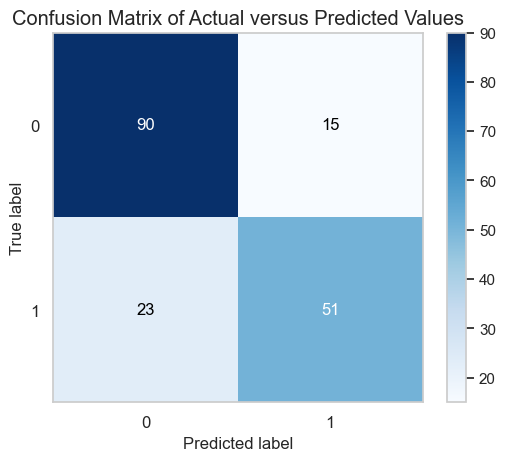

In [444]:
# Plot the confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title = 'Confusion Matrix of Actual versus Predicted Values')

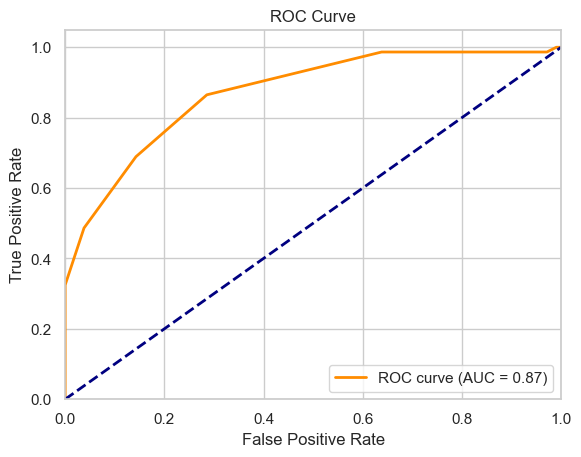

In [445]:
# Plot ROC Curve

# Predict probabilities for the test set
y_probs = decision_tree.predict_proba(X_test)[:, 1]  # Probability of belonging to class 1

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [446]:
# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



### Result

**Accuracy**: 0.79:
- This is the overall accuracy of the model, indicating the proportion of correctly predicted instances in the test data. In this case, the model correctly predicted around 79% of the samples in the test set.

**Confusion Matrix**:
- A confusion matrix is a table used to evaluate the performance of a classification algorithm. It consists of four values:
    - True Positives (TP): 51 - The number of instances correctly classified as "1" (Survived)(positive class).
    - True Negatives (TN): 90 - The number of instances correctly classified as "0" (Dead)(negative class).
    - False Positives (FP): 15 - The number of instances that were incorrectly classified as "1" when they are actually "0" (Type I error).
    - False Negatives (FN): 23 - The number of instances that were incorrectly classified as "0" when they are actually "1" (Type II error).

**Classification Report**:
The classification report provides additional metrics for each class (in this case, "0" and "1") and the weighted average:

- For class "0" (Negative Class):
    - Precision (0.80): Out of all instances predicted as "0," 80% were correct.
    - Recall (0.86): Out of all actual "0" instances, 86% were correctly predicted.
    - F1-score (0.83): The F1-score is the harmonic mean of precision and recall. It provides a balance between the two metrics.
    - Support (105): The number of instances in the test set with the true label "0" is 105.

- For class "1" (Positive Class):
    - Precision (0.77): Out of all instances predicted as "1," 77% were correct.
    - Recall (0.69): Out of all actual "1" instances, 69% were correctly predicted.
    - F1-score (0.73): The F1-score for class "1" is 0.73, indicating a balance between precision and recall.
    - Support (74): The number of instances in the test set with the true label "1."
    - Macro Avg: This is the unweighted average of precision, recall, and F1-score for both classes.
    - Weighted Avg: This is the average of precision, recall, and F1-score, with each class's score weighted by its support.

In summary, this model's performance indicates that it has a reasonable level of accuracy (79%) and is better at predicting class "0" (the negative class) compared to class "1" (the positive class).